<a href="https://colab.research.google.com/github/pepesrz91/simulacion_2021_mcc/blob/main/ProjectoFinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

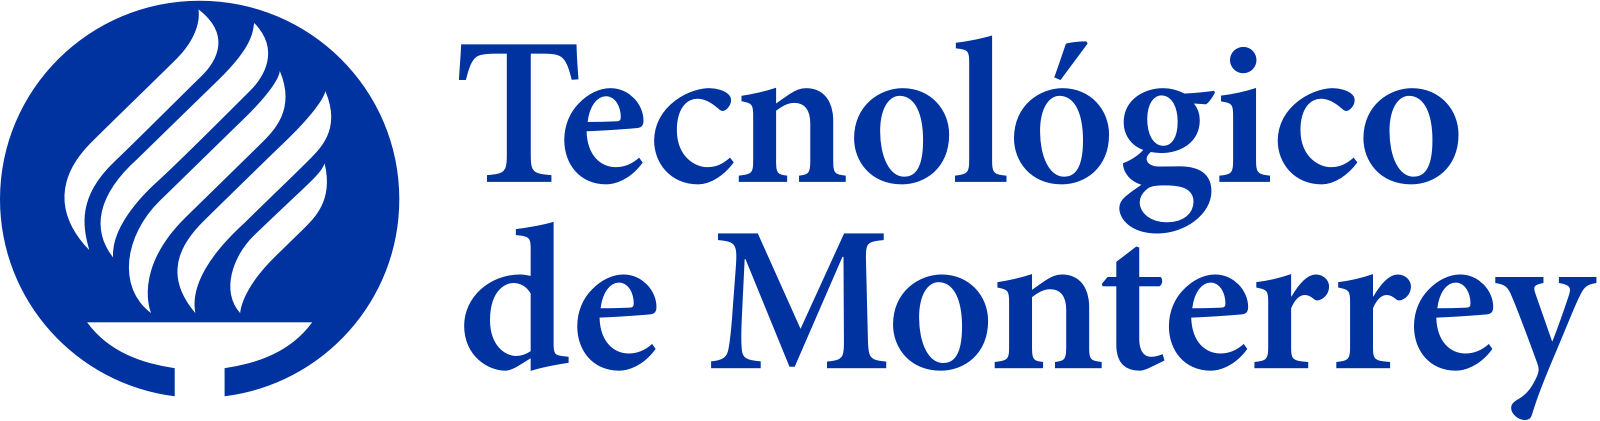

José Juan Suárez Ramos<br>
A01224078<br>

Tópicos Selectos de Aprendizaje Automático 2<br>
Proyecto Final 2. Modelos con sobre y sub muestreo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score
figure(figsize=(1, 1), dpi=80)

<Figure size 80x80 with 0 Axes>

<Figure size 80x80 with 0 Axes>

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Presentaciones/default_cards.csv")
data.rename({'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT'},axis = 1,inplace = True)
data = data[(data['EDUCATION'] != 0) & (data['EDUCATION'] != 5) & (data['EDUCATION'] != 6) & (data['MARRIAGE'] != 0) ]
data = data.drop("ID", 1)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score), 
           'roc_auc': make_scorer(roc_auc_score)
           }

sc = prep.StandardScaler()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
Y = data["DEFAULT"]
X = data.copy()

# X = pd.get_dummies(X,columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X.drop(["DEFAULT"], inplace=True, axis=1)
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

# Part 3 Sampling

## Random over-sampling + Random under-sampling 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
59/59 [==============================] - 1s 2ms/step - loss: 0.6633 - accuracy: 0.6100
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6672
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.6910
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6923
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.6960
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6961
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.6979
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.6994
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.6994
Epoch 10/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7008
Epoch 11/

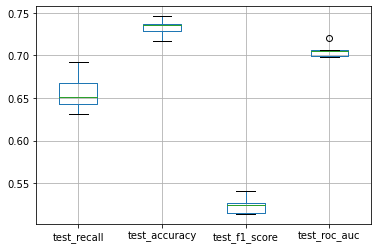

In [ ]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=23, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


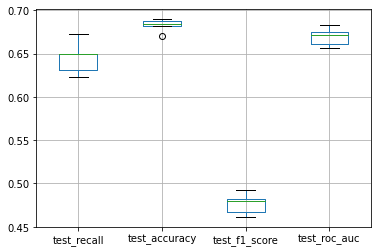

In [ ]:
## LR
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

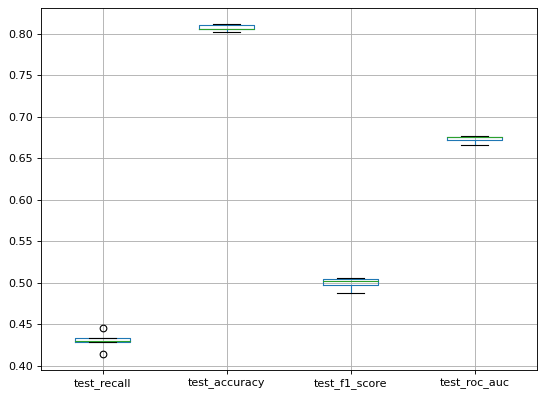

In [ ]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', rf)]
pipeline = Pipeline(steps=steps)

rf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
rf_cv_complete_scores = pd.DataFrame(rf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(rf_cv_complete_scores).boxplot()

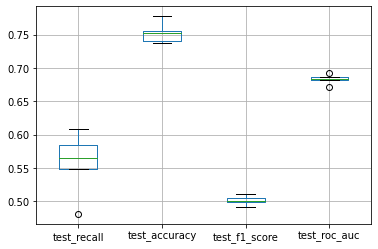

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


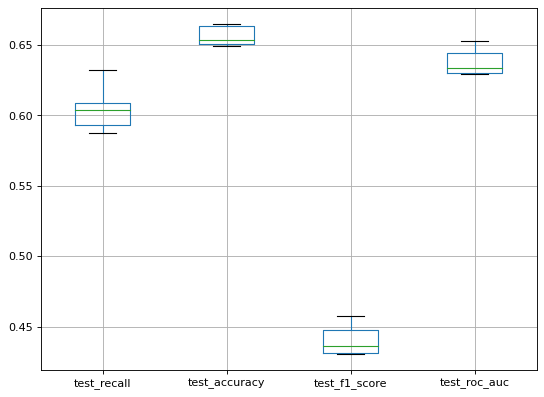

In [ ]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

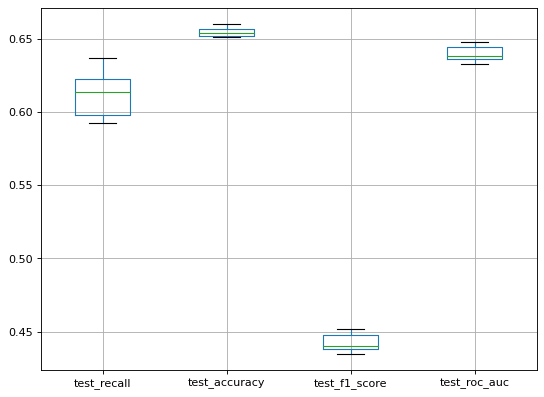

In [ ]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', RandomOverSampler()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
svm_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(svm_cv_complete_scores).boxplot()

In [ ]:
Xx, Yy = RandomOverSampler().fit_resample(X, Y)
Xx, Yy = RandomUnderSampler().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)

trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [ ]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.6851 - accuracy: 0.5700 - val_loss: 0.6710 - val_accuracy: 0.6346
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6252 - val_loss: 0.6533 - val_accuracy: 0.6412
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6393 - val_loss: 0.6369 - val_accuracy: 0.6445
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6336 - accuracy: 0.6517 - val_loss: 0.6239 - val_accuracy: 0.6518
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6216 - accuracy: 0.6617 - val_loss: 0.6126 - val_accuracy: 0.6575
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6143 - accuracy: 0.6700 - val_loss: 0.6051 - val_accuracy: 0.6691
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.6770 - val_loss: 0.5999 - val_accuracy: 0.6798
Epoch 8/100


In [ ]:
print(ann_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 20)                480       
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [ ]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      1366
           1       0.67      0.63      0.65      1276

    accuracy                           0.67      2642
   macro avg       0.67      0.67      0.67      2642
weighted avg       0.67      0.67      0.67      2642



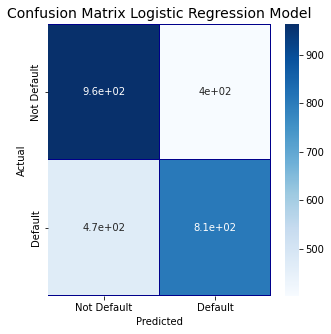

In [ ]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [ ]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1366
           1       0.74      0.54      0.62      1276

    accuracy                           0.69      2642
   macro avg       0.70      0.68      0.68      2642
weighted avg       0.70      0.69      0.68      2642



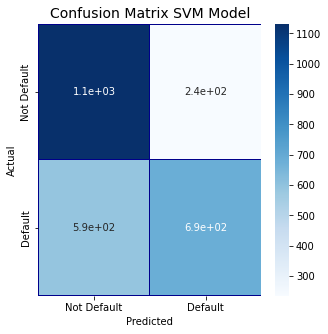

In [ ]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1366
           1       0.71      0.64      0.67      1276

    accuracy                           0.70      2642
   macro avg       0.70      0.70      0.70      2642
weighted avg       0.70      0.70      0.70      2642



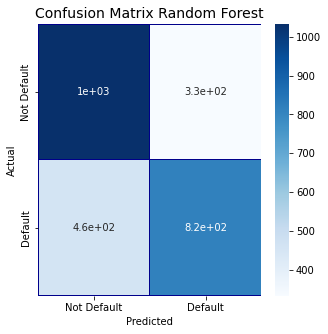

In [ ]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

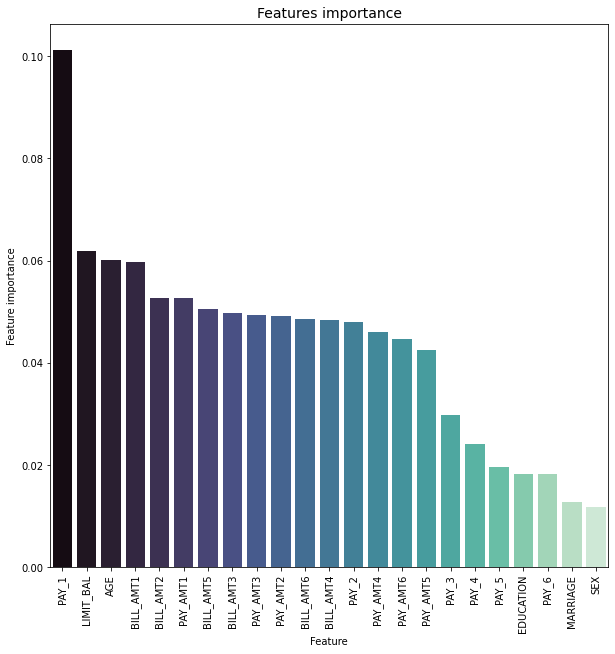

In [ ]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1366
           1       0.64      0.64      0.64      1276

    accuracy                           0.65      2642
   macro avg       0.65      0.65      0.65      2642
weighted avg       0.65      0.65      0.65      2642



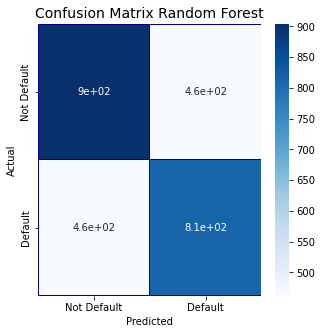

In [ ]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1366
           1       0.67      0.65      0.66      1276

    accuracy                           0.68      2642
   macro avg       0.68      0.68      0.68      2642
weighted avg       0.68      0.68      0.68      2642



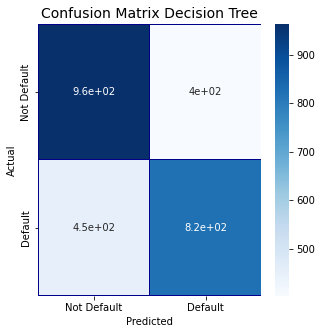

In [ ]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

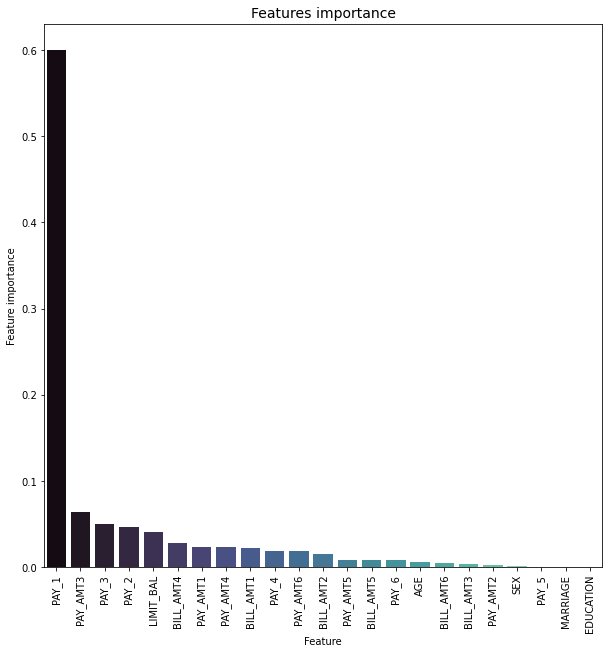

In [ ]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



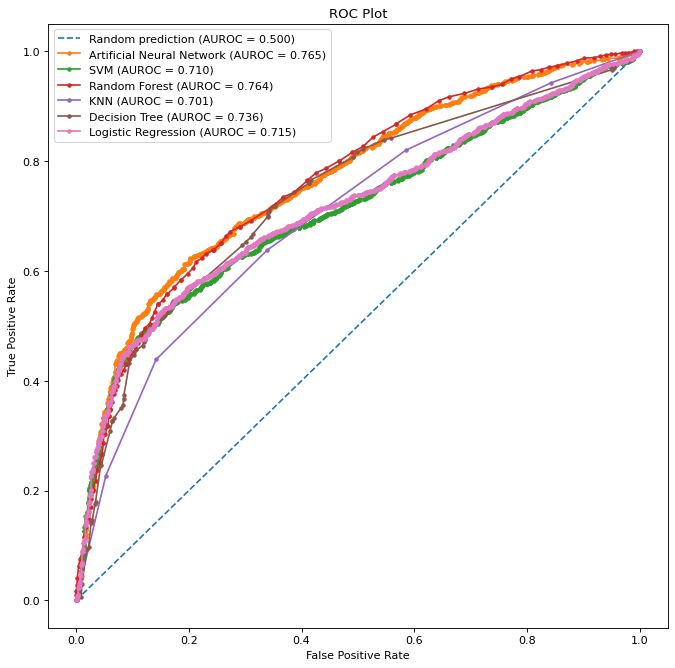

In [ ]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Smote + Random under-sampling 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5477 - mse: 0.2464 - mae: 0.4955
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.6217 - mse: 0.2354 - mae: 0.4814
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6429 - mse: 0.2257 - mae: 0.4647
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6495 - mse: 0.2196 - mae: 0.4503
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6764 - mse: 0.2144 - mae: 0.4393
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6852 - mse: 0.2109 - mae: 0.4306
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.6918 - mse: 0.2080 - mae: 0.4247
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6937 - mse: 0.206

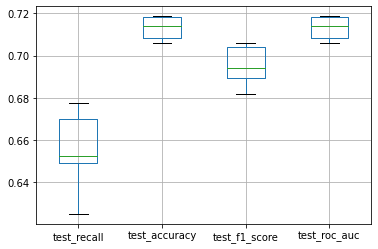

In [ ]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=23, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


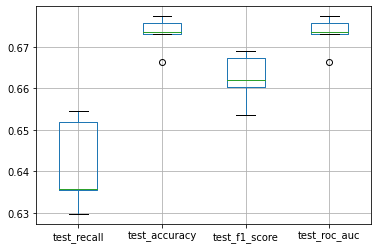

In [ ]:
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

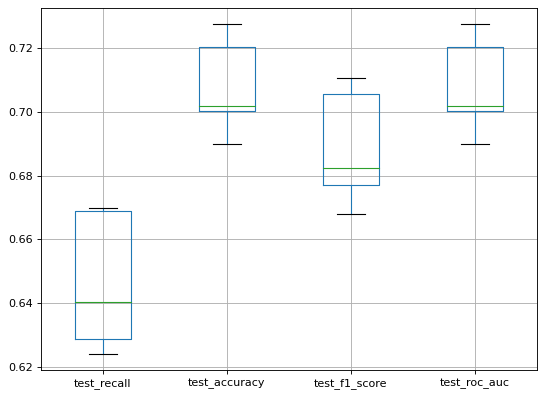

In [ ]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', rf)]
pipeline = Pipeline(steps=steps)

clf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(clf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

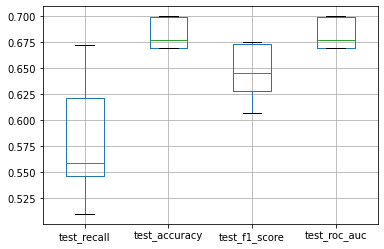

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


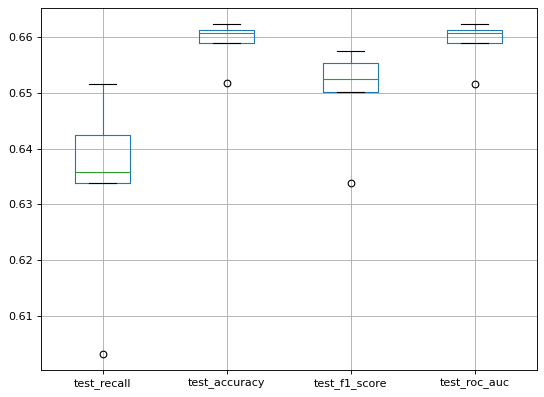

In [ ]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

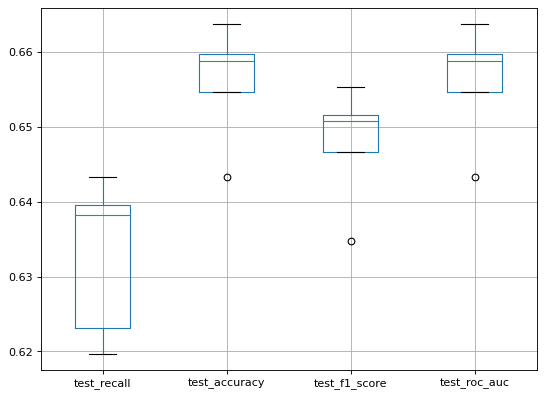

In [ ]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', SMOTE()), ('under', RandomUnderSampler()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
clf_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(clf_cv_complete_scores).boxplot()

In [ ]:
Xx, Yy = SMOTE().fit_resample(X, Y)
Xx, Yy = RandomUnderSampler().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [ ]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.6871 - accuracy: 0.5464 - mse: 0.2470 - mae: 0.4958 - val_loss: 0.6773 - val_accuracy: 0.6277 - val_mse: 0.2421 - val_mae: 0.4907
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6137 - mse: 0.2392 - mae: 0.4858 - val_loss: 0.6608 - val_accuracy: 0.6580 - val_mse: 0.2340 - val_mae: 0.4795
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6583 - accuracy: 0.6320 - mse: 0.2329 - mae: 0.4753 - val_loss: 0.6462 - val_accuracy: 0.6653 - val_mse: 0.2268 - val_mae: 0.4680
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6472 - accuracy: 0.6418 - mse: 0.2274 - mae: 0.4660 - val_loss: 0.6330 - val_accuracy: 0.6719 - val_mse: 0.2205 - val_mae: 0.4580
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6344 - accuracy: 0.6588 - mse: 0.2210 - mae: 0.4552 - val_loss: 0.6219 - val_accuracy: 0.6774 - val_mse:

In [ ]:
print(ann_model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 20)                480       
                                                                 
 dropout_34 (Dropout)        (None, 20)                0         
                                                                 
 dense_52 (Dense)            (None, 10)                210       
                                                                 
 dropout_35 (Dropout)        (None, 10)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [ ]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1300
           1       0.68      0.63      0.66      1342

    accuracy                           0.66      2642
   macro avg       0.66      0.66      0.66      2642
weighted avg       0.66      0.66      0.66      2642



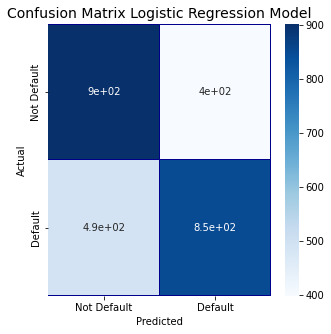

In [ ]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [ ]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1300
           1       0.76      0.51      0.61      1342

    accuracy                           0.67      2642
   macro avg       0.69      0.67      0.66      2642
weighted avg       0.69      0.67      0.66      2642



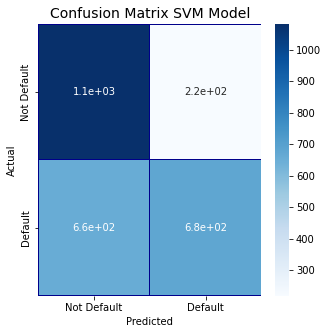

In [ ]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1300
           1       0.74      0.63      0.68      1342

    accuracy                           0.70      2642
   macro avg       0.70      0.70      0.70      2642
weighted avg       0.70      0.70      0.70      2642



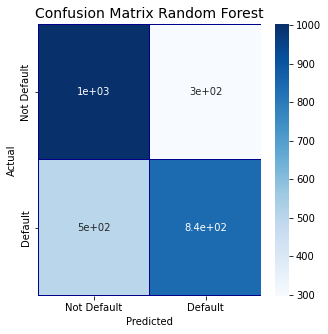

In [ ]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

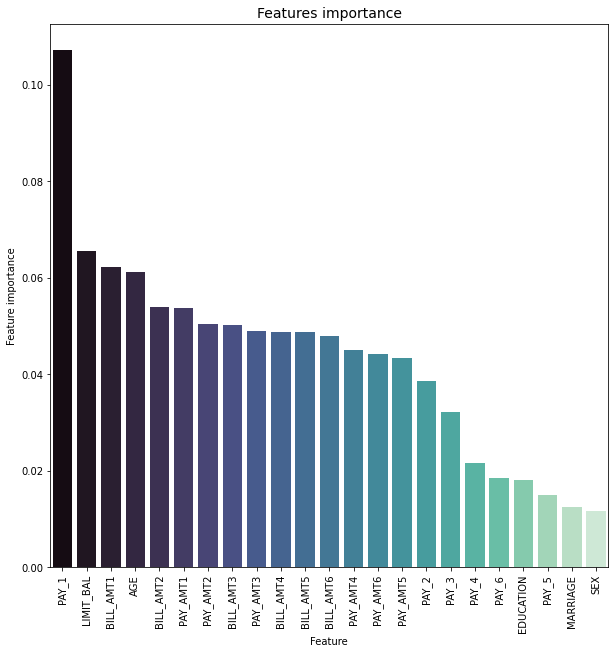

In [ ]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1300
           1       0.68      0.62      0.65      1342

    accuracy                           0.66      2642
   macro avg       0.66      0.66      0.66      2642
weighted avg       0.66      0.66      0.66      2642



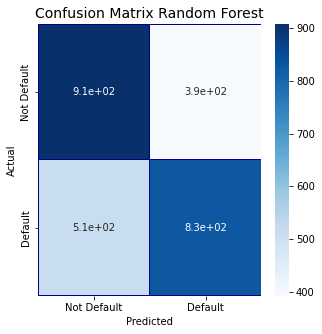

In [ ]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.65      0.80      0.71      1300
           1       0.74      0.58      0.65      1342

    accuracy                           0.69      2642
   macro avg       0.70      0.69      0.68      2642
weighted avg       0.70      0.69      0.68      2642



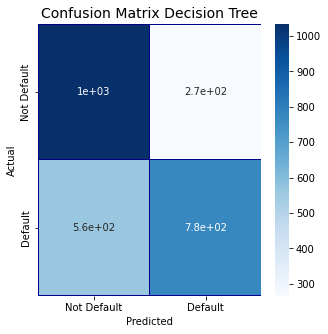

In [ ]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

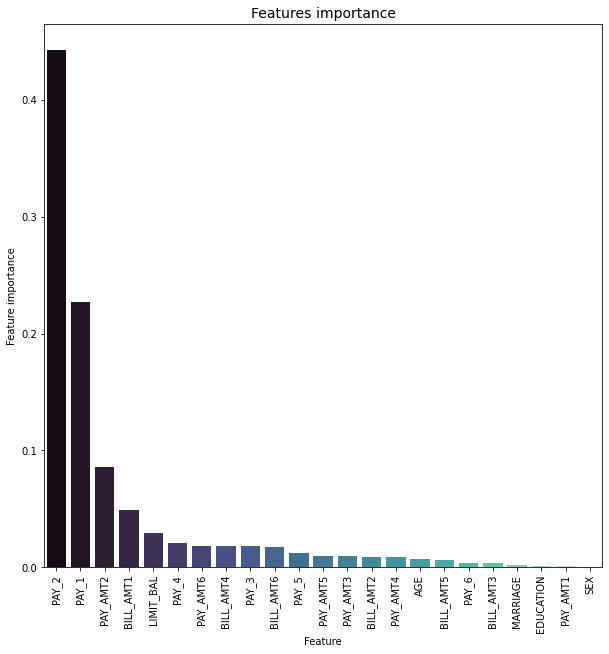

In [ ]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



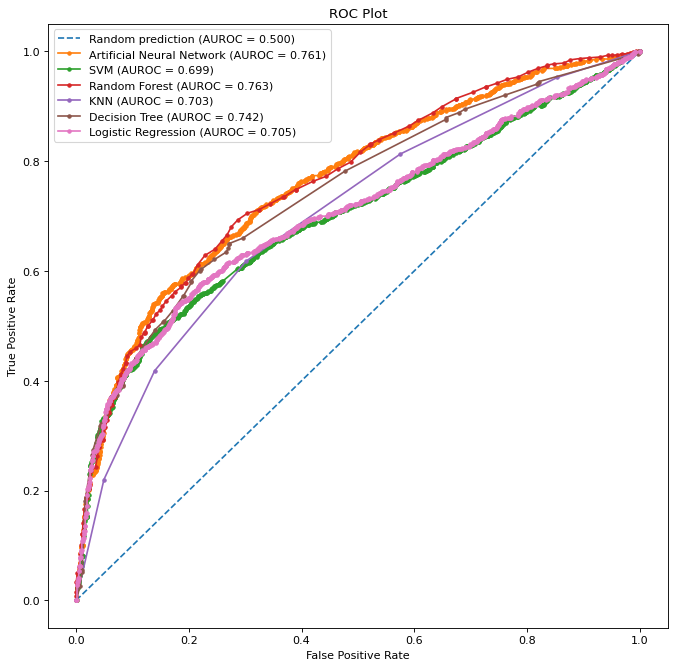

In [ ]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Random over-sampling + TomeKlinks

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6790 - accuracy: 0.6240 - mse: 0.2430 - mae: 0.4916
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.6665 - mse: 0.2338 - mae: 0.4784
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6800 - mse: 0.2248 - mae: 0.4625
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6812 - mse: 0.2175 - mae: 0.4500
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.7036 - mse: 0.2102 - mae: 0.4372
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7164 - mse: 0.2052 - mae: 0.4254
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7211 - mse: 0.1997 - mae: 0.4129
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7219 - mse: 0.196

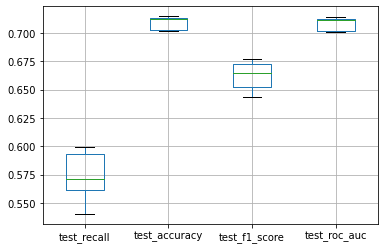

In [ ]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=23, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


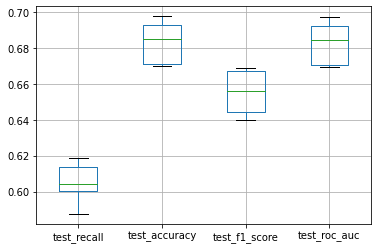

In [ ]:
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

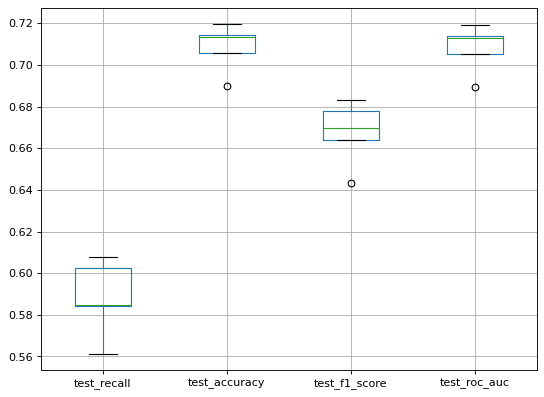

In [ ]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', rf)]
pipeline = Pipeline(steps=steps)

rf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
rf_cv_complete_scores = pd.DataFrame(rf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(rf_cv_complete_scores).boxplot()

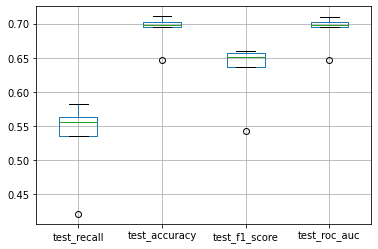

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


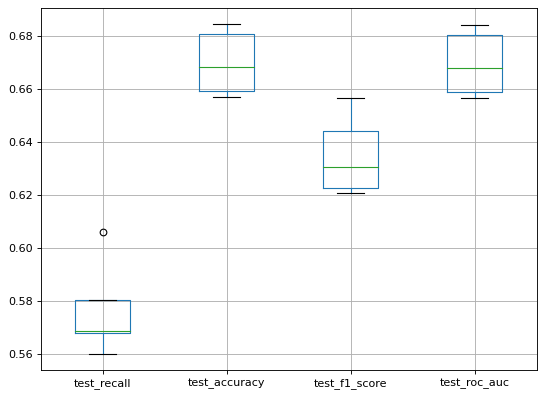

In [ ]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

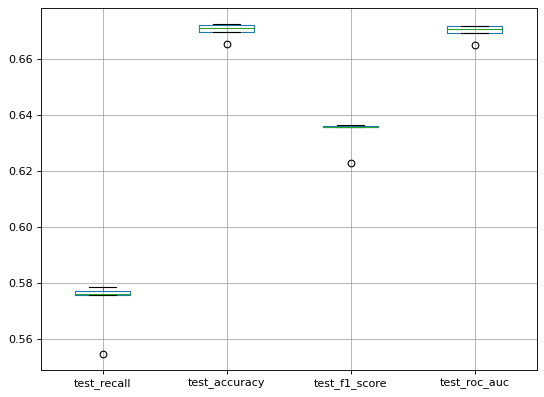

In [ ]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', SMOTE()), ('under', TomekLinks()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
svm_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(svm_cv_complete_scores).boxplot()

In [ ]:
Xx, Yy = SMOTE().fit_resample(X, Y)
Xx, Yy = TomekLinks().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [ ]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 0.6765 - accuracy: 0.6218 - mse: 0.2417 - mae: 0.4892 - val_loss: 0.6417 - val_accuracy: 0.7930 - val_mse: 0.2244 - val_mae: 0.4709
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6227 - accuracy: 0.7905 - mse: 0.2155 - mae: 0.4571 - val_loss: 0.5952 - val_accuracy: 0.8011 - val_mse: 0.2020 - val_mae: 0.4393
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.7991 - mse: 0.1989 - mae: 0.4276 - val_loss: 0.5582 - val_accuracy: 0.8027 - val_mse: 0.1852 - val_mae: 0.4084
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.8041 - mse: 0.1856 - mae: 0.4001 - val_loss: 0.5329 - val_accuracy: 0.8032 - val_mse: 0.1740 - val_mae: 0.3826
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5459 - accuracy: 0.8053 - mse: 0.1793 - mae: 0.3817 - val_loss: 0.5153 - val_accuracy: 0.8035 - val_mse:

In [ ]:
print(ann_model.summary())

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 20)                480       
                                                                 
 dropout_46 (Dropout)        (None, 20)                0         
                                                                 
 dense_70 (Dense)            (None, 10)                210       
                                                                 
 dropout_47 (Dropout)        (None, 10)                0         
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [ ]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4224
           1       0.41      0.66      0.51      1340

    accuracy                           0.69      5564
   macro avg       0.64      0.68      0.64      5564
weighted avg       0.76      0.69      0.71      5564



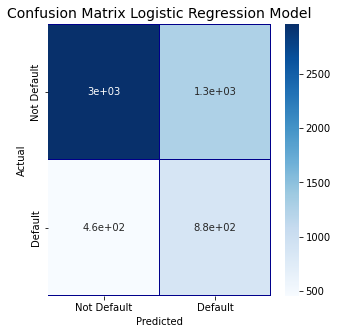

In [ ]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [ ]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4224
           1       0.71      0.31      0.43      1340

    accuracy                           0.80      5564
   macro avg       0.76      0.63      0.65      5564
weighted avg       0.79      0.80      0.77      5564



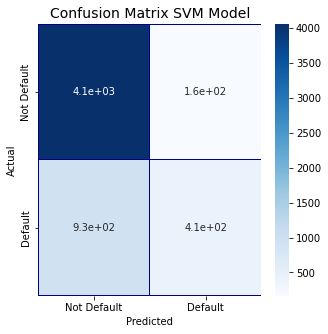

In [ ]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4224
           1       0.68      0.41      0.51      1340

    accuracy                           0.81      5564
   macro avg       0.76      0.68      0.70      5564
weighted avg       0.80      0.81      0.79      5564



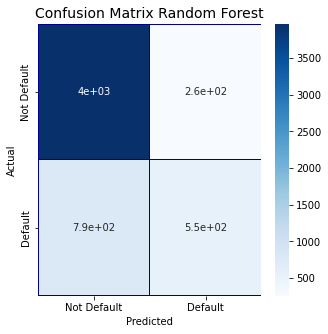

In [ ]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

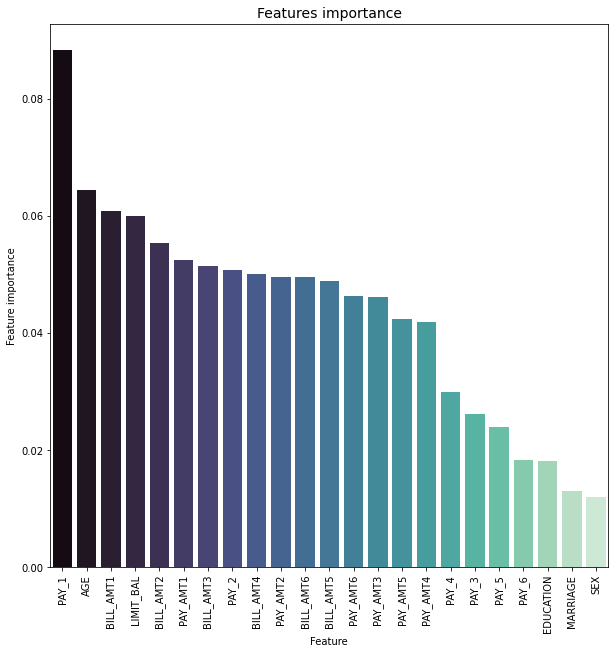

In [ ]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4224
           1       0.57      0.39      0.46      1340

    accuracy                           0.78      5564
   macro avg       0.70      0.65      0.66      5564
weighted avg       0.76      0.78      0.77      5564



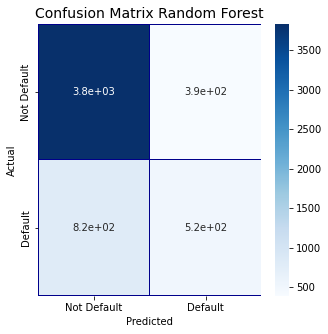

In [ ]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4224
           1       0.66      0.39      0.49      1340

    accuracy                           0.80      5564
   macro avg       0.74      0.66      0.68      5564
weighted avg       0.79      0.80      0.78      5564



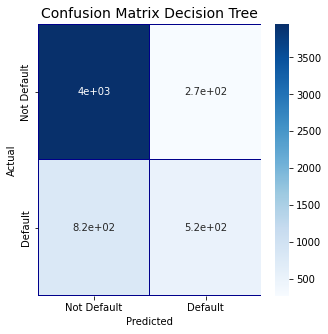

In [ ]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

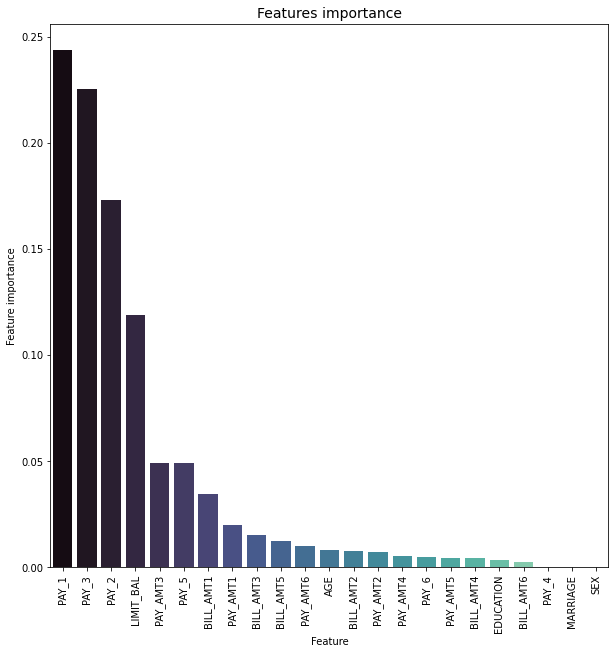

In [ ]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



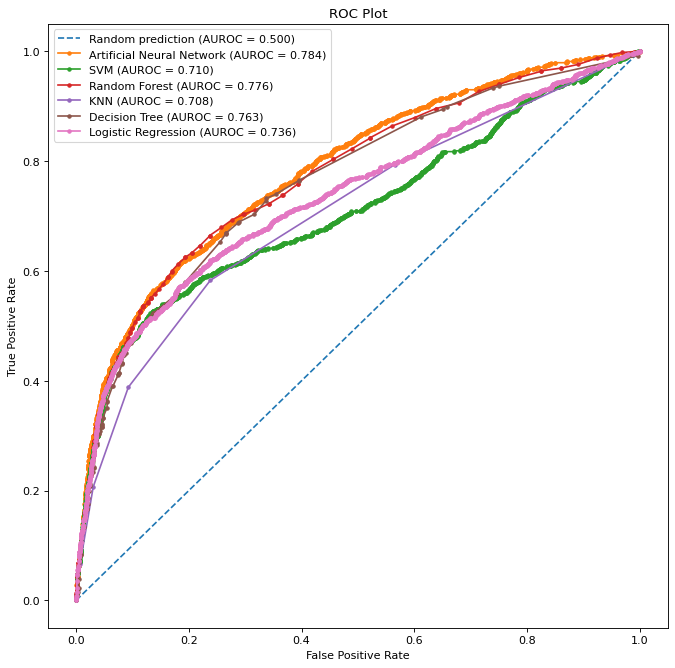

In [ ]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Random over-sampling + ENN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 0.6650 - accuracy: 0.6390 - mse: 0.2362 - mae: 0.4837
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6938 - mse: 0.2053 - mae: 0.4394
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7135 - mse: 0.1844 - mae: 0.3941
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7295 - mse: 0.1740 - mae: 0.3648
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7400 - mse: 0.1666 - mae: 0.3469
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7473 - mse: 0.1609 - mae: 0.3341
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.7577 - mse: 0.1557 - mae: 0.3225
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7681 - mse: 0.151

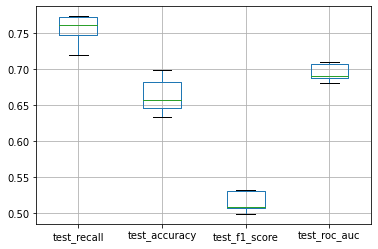

In [ ]:
### ANN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from imblearn.combine import SMOTEENN
from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
# from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


input_dim = trainX.shape[1]

# trainYAnn = to_categorical(trainY, 2)
testYAnn = to_categorical(testY, 2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(units=20, input_dim=23, activation='relu', kernel_initializer='uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])
	return model

neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=500, 
                                 verbose=1)

steps = [('over', SMOTEENN()), ('model', neural_network)]
pipeline = Pipeline(steps=steps)

ann_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
ann_complete_scores = pd.DataFrame(ann_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(ann_complete_scores).boxplot()


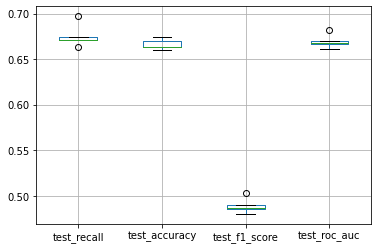

In [ ]:
lr_model = LogisticRegression(class_weight="balanced")
steps = [('over', SMOTEENN()), ('model', lr_model)]
pipeline = Pipeline(steps=steps)
lr_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)



lr_complete_scores = pd.DataFrame(lr_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(lr_complete_scores).boxplot()

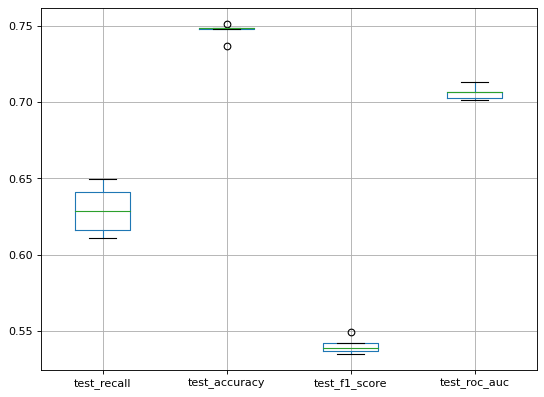

In [ ]:
## Random Forest

rf = RandomForestClassifier()

steps = [('over', SMOTEENN()), ('model', rf)]
pipeline = Pipeline(steps=steps)

rf_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
rf_cv_complete_scores = pd.DataFrame(rf_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(rf_cv_complete_scores).boxplot()

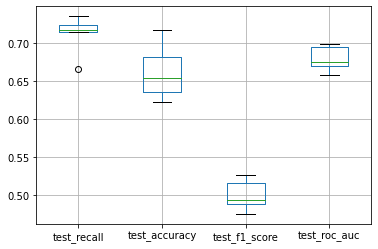

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
steps = [('over', SMOTEENN()), ('model', tree_cv)]
pipeline = Pipeline(steps=steps)

tree_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
tree_cv_complete_scores = pd.DataFrame(tree_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
pd.DataFrame(tree_cv_complete_scores).boxplot()


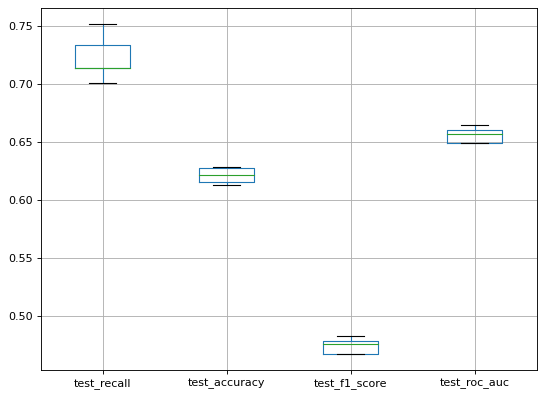

In [ ]:
## KNN (Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors=5)
steps = [('over', SMOTEENN()), ('model', knn)]
pipeline = Pipeline(steps=steps)

knn_cv_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
knn_cv_complete_scores = pd.DataFrame(knn_cv_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(knn_cv_complete_scores).boxplot()

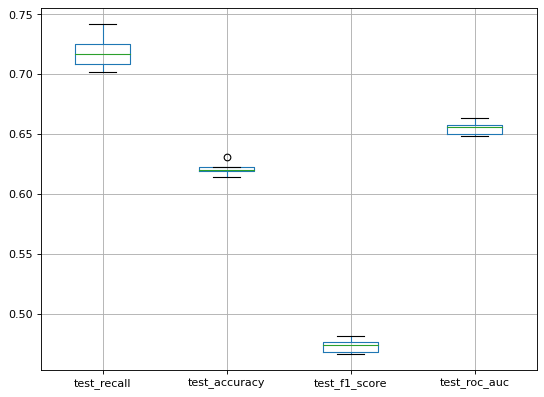

In [ ]:
### SVM
svm_model = SVC(gamma='auto')

steps = [('over', SMOTEENN()), ('model', knn)]
pipeline = Pipeline(steps=steps)

svm_scores = cross_validate(pipeline, trainX, trainY, scoring=scoring, cv=cv)
svm_cv_complete_scores = pd.DataFrame(svm_scores)[ ["test_recall", "test_accuracy", "test_f1_score", "test_roc_auc"]]
figure(figsize=(8, 6), dpi=80)
pd.DataFrame(svm_cv_complete_scores).boxplot()

In [ ]:
Xx, Yy = SMOTEENN().fit_resample(X, Y)

trainX, testX, trainY, testY = model_selection.train_test_split(Xx, Yy, train_size=0.8, shuffle=True,  random_state=None)


trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

In [ ]:
## ANN
ann_model = create_model()

history = ann_model.fit(trainX, trainY, epochs=100, batch_size=500, validation_split=0.4)
ann_pred_proba = ann_model.predict(testX)
ann_pred_predict = ann_model.predict(testX)

Epoch 1/100
26/26 [==============================] - 1s 13ms/step - loss: 0.6284 - accuracy: 0.6815 - mse: 0.2189 - mae: 0.4608 - val_loss: 0.5625 - val_accuracy: 0.7414 - val_mse: 0.1892 - val_mae: 0.4172
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.7435 - mse: 0.1789 - mae: 0.3898 - val_loss: 0.4937 - val_accuracy: 0.7721 - val_mse: 0.1629 - val_mae: 0.3556
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7669 - mse: 0.1612 - mae: 0.3440 - val_loss: 0.4663 - val_accuracy: 0.7795 - val_mse: 0.1526 - val_mae: 0.3235
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.7768 - mse: 0.1540 - mae: 0.3214 - val_loss: 0.4553 - val_accuracy: 0.7838 - val_mse: 0.1484 - val_mae: 0.3088
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4615 - accuracy: 0.7838 - mse: 0.1502 - mae: 0.3098 - val_loss: 0.4500 - val_accuracy: 0.7856 - val_mse:

In [ ]:
print(ann_model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 20)                480       
                                                                 
 dropout_58 (Dropout)        (None, 20)                0         
                                                                 
 dense_88 (Dense)            (None, 10)                210       
                                                                 
 dropout_59 (Dropout)        (None, 10)                0         
                                                                 
 dense_89 (Dense)            (None, 1)                 11        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# LR
lr_model = LogisticRegression(class_weight="balanced")
lr_model = lr_model.fit(trainX, trainY)
lr_model_proba = lr_model.predict_proba(testX)[::,1]
lr_pred = lr_model.predict(testX)

In [ ]:
print(classification_report(testY, lr_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      2022
           1       0.85      0.78      0.81      3343

    accuracy                           0.77      5365
   macro avg       0.76      0.77      0.76      5365
weighted avg       0.78      0.77      0.78      5365



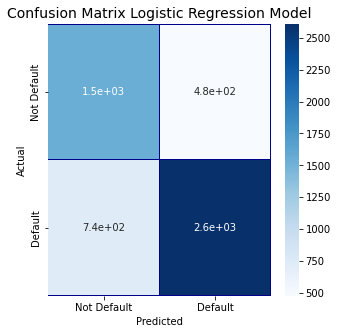

In [ ]:
cm = confusion_matrix(testY, lr_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Logistic Regression Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## SVM
svm_model = SVC(gamma='auto', probability=True, kernel='linear')
svm_model = svm_model.fit(trainX, trainY)
svm_pred_proba = svm_model.predict_proba(testX)[::,1]
svm_pred = svm_model.predict(testX)

In [ ]:
svm_pred = svm_model.predict(testX)
print(classification_report(testY, svm_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      2022
           1       0.79      0.86      0.82      3343

    accuracy                           0.77      5365
   macro avg       0.76      0.74      0.75      5365
weighted avg       0.77      0.77      0.76      5365



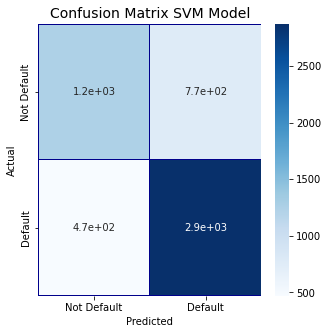

In [ ]:
cm = confusion_matrix(testY, svm_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix SVM Model', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(trainX, trainY)
rf_pred_proba = rf_model.predict_proba(testX)[::,1]
rf_pred = rf_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, rf_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2022
           1       0.91      0.92      0.92      3343

    accuracy                           0.90      5365
   macro avg       0.89      0.89      0.89      5365
weighted avg       0.90      0.90      0.90      5365



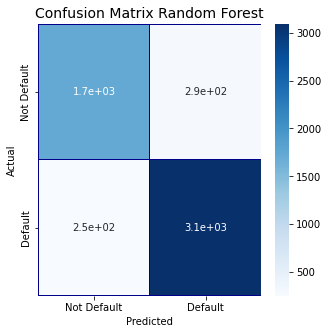

In [ ]:
cm = confusion_matrix(testY, rf_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

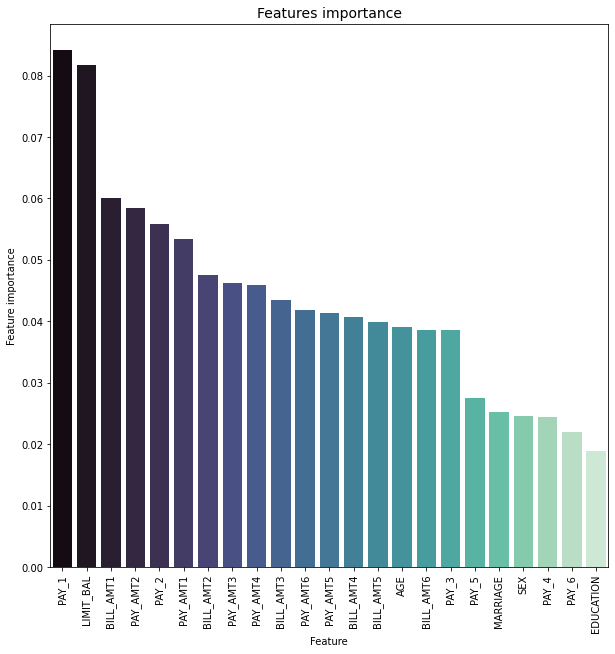

In [ ]:
x_col_names = []
for col in X.columns:
  x_col_names.append(col)

tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': rf_model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
sns.color_palette("mako", as_cmap=True)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
## KNN 
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model = knn_model.fit(trainX, trainY)
knn_model_proba = knn_model.predict_proba(testX)[::,1]
knn_model_pred = knn_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT RANDOM FOREST")
print(classification_report(testY, knn_model_pred))

CLASSIFICATION REPORT RANDOM FOREST
              precision    recall  f1-score   support

           0       0.80      0.68      0.74      2022
           1       0.82      0.90      0.86      3343

    accuracy                           0.82      5365
   macro avg       0.81      0.79      0.80      5365
weighted avg       0.81      0.82      0.81      5365



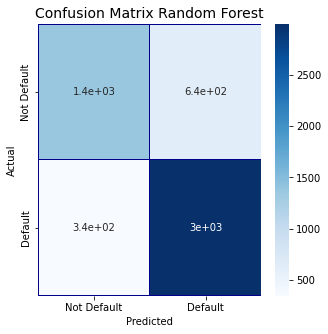

In [ ]:
cm = confusion_matrix(testY, knn_model_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Random Forest', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## Decision Tree Classifier
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)
tree_model = tree_cv.fit(trainX, trainY)
tree_pred_proba = tree_model.predict_proba(testX)[::,1]
tree_pred = tree_model.predict(testX)

In [ ]:
print("CLASSIFICATION REPORT DECISION TREE")
print(classification_report(testY, tree_pred))

CLASSIFICATION REPORT DECISION TREE
              precision    recall  f1-score   support

           0       0.74      0.67      0.71      2022
           1       0.81      0.86      0.83      3343

    accuracy                           0.79      5365
   macro avg       0.78      0.77      0.77      5365
weighted avg       0.79      0.79      0.79      5365



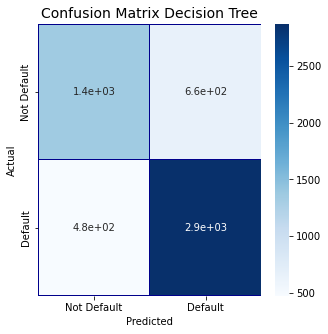

In [ ]:
cm = confusion_matrix(testY, tree_pred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix Decision Tree', fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

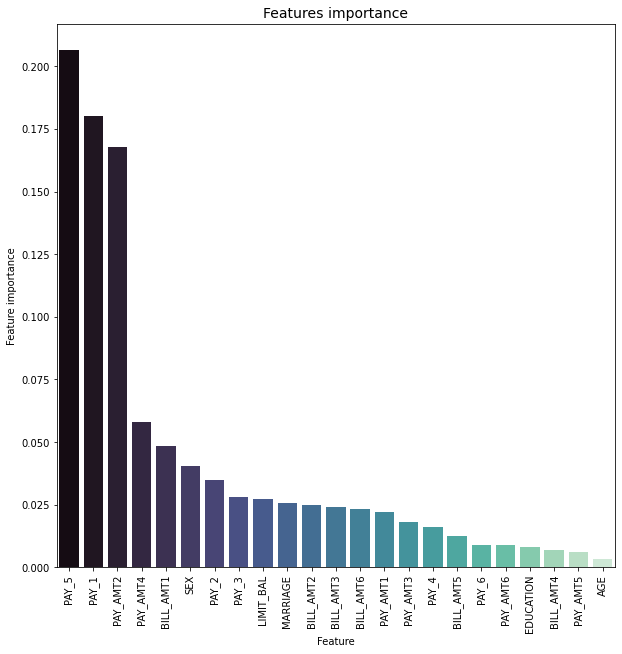

In [ ]:
tmp = pd.DataFrame({'Feature': x_col_names, 'Feature importance': tree_model.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (10,10))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp, palette="mako")
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:

### Curvas ROC
lr_auc = roc_auc_score(testY, lr_model_proba)
lr_fpr, lr_tpr, _ = roc_curve(testY, lr_model_proba)

ann_auc = roc_auc_score(testY, ann_pred_proba)
ann_fpr, ann_tpr, _ = roc_curve(testY, ann_pred_proba)

svm_auc = roc_auc_score(testY, svm_pred_proba)
svm_fpr, svm_tpr, _ = roc_curve(testY, svm_pred_proba)

rf_auc = roc_auc_score(testY, rf_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(testY, rf_pred_proba)

knn_auc = roc_auc_score(testY, knn_model_proba)
knn_fpr, knn_tpr, _ = roc_curve(testY, knn_model_proba)

tree_auc = roc_auc_score(testY, tree_pred_proba)
tree_fpr, tree_tpr, _ = roc_curve(testY, tree_pred_proba)



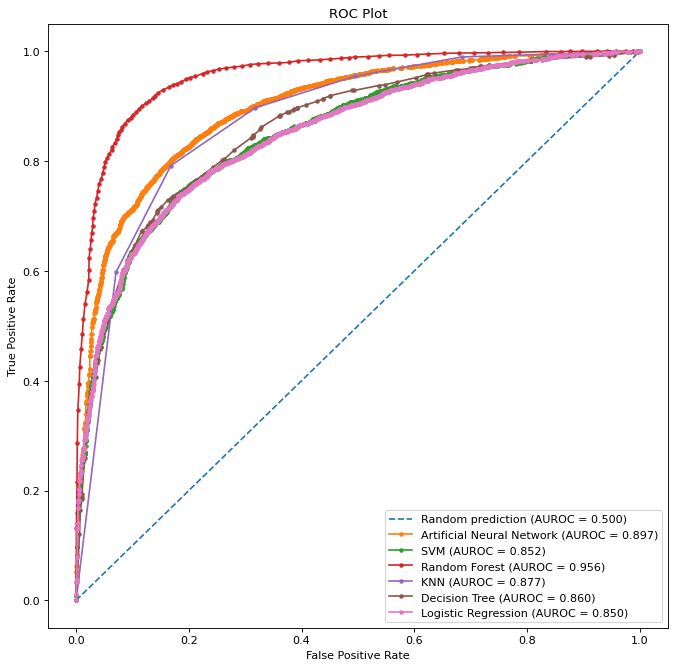

In [ ]:
r_probs = [0 for _ in range(len(testY))]
r_auc = roc_auc_score(testY, r_probs)
r_fpr, r_tpr, _ = roc_curve(testY, r_probs)
figure(figsize=(10, 10), dpi=80)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ann_fpr, ann_tpr, marker='.', label='Artificial Neural Network (AUROC = %0.3f)' % ann_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % tree_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

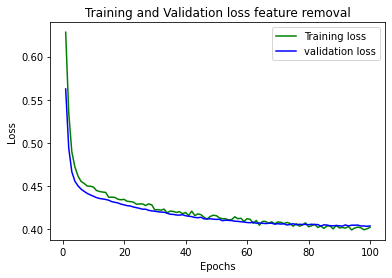

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss feature removal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

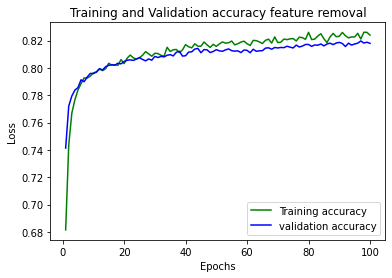

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy feature removal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

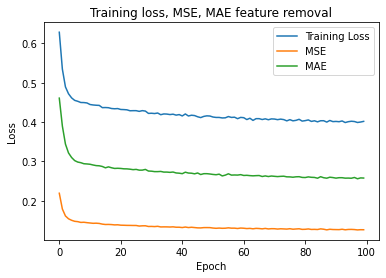

In [ ]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['mse'])
pyplot.plot(history.history['mae'])
plt.legend(['Training Loss', 'MSE', 'MAE'])
plt.title('Training loss, MSE, MAE feature removal')
plt.xlabel('Epoch')
plt.ylabel('Loss')
pyplot.show()

# Conclusiones

EL mejor modelo el que utilizo un método de SMOTEENN y que nos arrojo las mejores curvas ROC para cada modelo. 

El mejor modelos con este método fue RandomForest y ANN... 

Con estra estrategia de muestreo todos nuestros modelos tuvieron una buena ejecución y métricos a comparación de las estrategias usadas anterioremente.  